In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

In [12]:
data1 = pd.read_excel (r'./Matric_Couverture3_evolution.xlsx', index_col=None, header=None)
data1

,0,1,2,3,4,5,6,7,8,9,...,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157
0,Evolution:,0,0,2,0,0,3,0,0,0,...,0,0,2,1,0,1,0,0,1,0
1,NaN,le système affiche les boutons des réseaux soc...,"sur le logo depuis une page intérieure, le sys...","Sur le logo depuis la page daccueil, le systè...",Si lutilisateur clique sur le bouton daccess...,Un clic sur un bouton de réseaux sociaux perme...,Le système affiche :,"Au clic sur la langue sélectionnée, le système...","Si la langue sélectionnée est français, le sys...","Si la langue sélectionnée est anglais, le syst...",...,Déplacement du doigt de gauche à droite : le s...,Déplacement du doigt de droite à gauche : le s...,Au clic sur un élément du parcours,Le libellé Aller à luvre suivante,"Au clic sur la croix, on réinitialise laffich...",Au clic sur le libellé Aller à luvre suivant...,"Les blocs de texte sont affichés à la suite, s...",Les ronds ne sont pas cliquables,"Au clic sur le visuel du parcours, le système ...",Libellé Champ de partage twitter + Titre + ...
2,4.1.1\tCU001-001 Afficher le header,X,X,X,X,X,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.1.2\tCU001-002 Afficher le bouton de langue,NaN,NaN,NaN,NaN,NaN,X,X,X,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.1.3\tCU001-0021 Afficher la page Langue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.1.4\tCU001-0022 Contribuer la page langue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.1.5\tCU001-003 Afficher le fil dariane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.1.6\tCU001-004 Afficher le bouton de partage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4.1.7\tCU001-005 Afficher le menu de navigation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4.1.8\tCU001-006 Modifier le menu de navigation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data = pd.DataFrame(data1)
data

,0,1,2,3,4,5,6,7,8,9,...,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157
0,Evolution:,0,0,2,0,0,3,0,0,0,...,0,0,2,1,0,1,0,0,1,0
1,NaN,le système affiche les boutons des réseaux soc...,"sur le logo depuis une page intérieure, le sys...","Sur le logo depuis la page daccueil, le systè...",Si lutilisateur clique sur le bouton daccess...,Un clic sur un bouton de réseaux sociaux perme...,Le système affiche :,"Au clic sur la langue sélectionnée, le système...","Si la langue sélectionnée est français, le sys...","Si la langue sélectionnée est anglais, le syst...",...,Déplacement du doigt de gauche à droite : le s...,Déplacement du doigt de droite à gauche : le s...,Au clic sur un élément du parcours,Le libellé Aller à luvre suivante,"Au clic sur la croix, on réinitialise laffich...",Au clic sur le libellé Aller à luvre suivant...,"Les blocs de texte sont affichés à la suite, s...",Les ronds ne sont pas cliquables,"Au clic sur le visuel du parcours, le système ...",Libellé Champ de partage twitter + Titre + ...
2,4.1.1\tCU001-001 Afficher le header,X,X,X,X,X,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.1.2\tCU001-002 Afficher le bouton de langue,NaN,NaN,NaN,NaN,NaN,X,X,X,X,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.1.3\tCU001-0021 Afficher la page Langue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.1.4\tCU001-0022 Contribuer la page langue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.1.5\tCU001-003 Afficher le fil dariane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4.1.6\tCU001-004 Afficher le bouton de partage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4.1.7\tCU001-005 Afficher le menu de navigation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4.1.8\tCU001-006 Modifier le menu de navigation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data = data.iloc[0:2]
data=data.transpose()
data = data[[1, 0]]
data.columns = ["texte", "Evolution"]
data=data.drop(index=0)
data

,texte,Evolution
1,le système affiche les boutons des réseaux soc...,0
2,"sur le logo depuis une page intérieure, le sys...",0
3,"Sur le logo depuis la page daccueil, le systè...",2
4,Si lutilisateur clique sur le bouton daccess...,0
5,Un clic sur un bouton de réseaux sociaux perme...,0
6,Le système affiche :,3
7,"Au clic sur la langue sélectionnée, le système...",0
8,"Si la langue sélectionnée est français, le sys...",0
9,"Si la langue sélectionnée est anglais, le syst...",0
10,"Si la langue sélectionnée est espagnol, le sys...",0


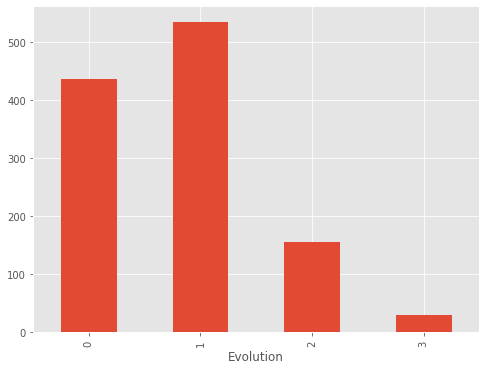

In [15]:
import matplotlib.pyplot as plt 
fig = plt.figure (figsize = (8,6)) 
data.groupby ('Evolution').texte.count (). plot.bar (ylim = 0) 
plt.show ()

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data["texte"], data["Evolution"].astype('category'), test_size=0.3, random_state=0)

In [109]:
y_test.shape

(348,)

In [17]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train.values)

X_train_vec = tokenizer.texts_to_sequences(X_train.values)
X_test_vec = tokenizer.texts_to_sequences(X_test.values)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(X_train.values[2])
print(X_train_vec[2])

Le système affiche les accès rapides :
[1, 4, 5, 6, 214, 391]


In [18]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 50

X_train_vec = pad_sequences(X_train_vec, padding='post', maxlen=maxlen)
X_test_vec = pad_sequences(X_test_vec, padding='post', maxlen=maxlen)

print(X_train_vec[0, :])

[  6 483 389 291   2   3 256   2   3  21   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]


In [28]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    

## RNN Simple

### Avec 2 couches Denses

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

input_dim = X_train_vec.shape[1]
model = Sequential()
model.add(layers.Dense(200, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

In [23]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               10200     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 804       
Total params: 11,004
Trainable params: 11,004
Non-trainable params: 0
_________________________________________________________________


In [29]:
history = model.fit(X_train_vec, y_train,
                    epochs=40,
                    verbose=True,
                    validation_data=(X_test_vec, y_test),
                    batch_size=10)

Epoch 1/40
81/81 [==============================] - 0s 2ms/step - loss: 2.9289 - accuracy: 0.7058 - val_loss: 12.4738 - val_accuracy: 0.3994
Epoch 2/40
81/81 [==============================] - 0s 2ms/step - loss: 1.4284 - accuracy: 0.7577 - val_loss: 11.9911 - val_accuracy: 0.3908
Epoch 3/40
81/81 [==============================] - 0s 3ms/step - loss: 1.1142 - accuracy: 0.7787 - val_loss: 11.8390 - val_accuracy: 0.3621
Epoch 4/40
81/81 [==============================] - 0s 2ms/step - loss: 1.0961 - accuracy: 0.8047 - val_loss: 13.3903 - val_accuracy: 0.4483
Epoch 5/40
81/81 [==============================] - 0s 2ms/step - loss: 1.4397 - accuracy: 0.8022 - val_loss: 11.3447 - val_accuracy: 0.4167
Epoch 6/40
81/81 [==============================] - 0s 2ms/step - loss: 1.1977 - accuracy: 0.7763 - val_loss: 11.7104 - val_accuracy: 0.4368
Epoch 7/40
81/81 [==============================] - 0s 2ms/step - loss: 1.1990 - accuracy: 0.8022 - val_loss: 12.5047 - val_accuracy: 0.3649
Epoch 8/40
81

In [30]:
loss, accuracy = model.evaluate(X_train_vec, y_train, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  1.795383095741272           Accuracy:  0.7601977586746216


In [31]:
loss, accuracy = model.evaluate(X_test_vec, y_test, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  14.221170425415039           Accuracy:  0.3362068831920624


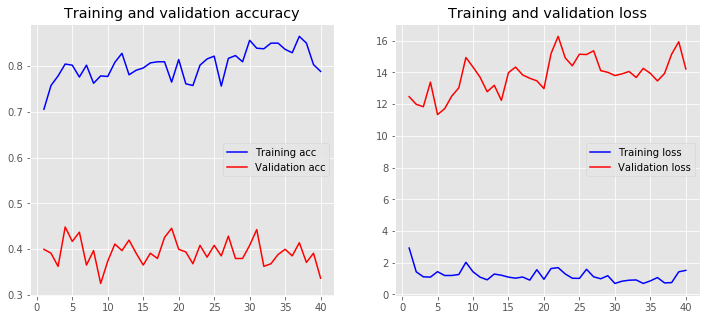

In [32]:
plot_history(history)


In [33]:
y_pred = model.predict(X_test_vec)
print(confusion_matrix(y_test, np.argmax(y_pred, axis = 1)))
print(classification_report(y_test,np.argmax(y_pred, axis = 1)))
print(accuracy_score(y_test, np.argmax(y_pred, axis = 1)))

[[50 49 30  4]
 [51 51 50  2]
 [20 17 15  0]
 [ 3  1  4  1]]
              precision    recall  f1-score   support

           0       0.40      0.38      0.39       133
           1       0.43      0.33      0.38       154
           2       0.15      0.29      0.20        52
           3       0.14      0.11      0.12         9

    accuracy                           0.34       348
   macro avg       0.28      0.28      0.27       348
weighted avg       0.37      0.34      0.35       348

0.33620689655172414


In [34]:
embedding_dim = 50

### Avec 3 couches Denses

In [36]:
from tensorflow.keras.optimizers import SGD

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 50)            54450     
_________________________________________________________________
flatten_1 (Flatten)          (None, 2500)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               500200    
_________________________________________________________________
dense_6 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 804       
Total params: 595,654
Trainable params: 595,654
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model.fit(X_train_vec, y_train, epochs=30, verbose=2, validation_data=(X_test_vec, y_test), batch_size=10)

Epoch 1/30
81/81 - 1s - loss: 1.1381 - accuracy: 0.4475 - val_loss: 1.1060 - val_accuracy: 0.4425
Epoch 2/30
81/81 - 1s - loss: 1.0919 - accuracy: 0.4574 - val_loss: 1.1100 - val_accuracy: 0.3851
Epoch 3/30
81/81 - 0s - loss: 1.0819 - accuracy: 0.4660 - val_loss: 1.1123 - val_accuracy: 0.4368
Epoch 4/30
81/81 - 1s - loss: 1.0792 - accuracy: 0.4586 - val_loss: 1.1078 - val_accuracy: 0.4454
Epoch 5/30
81/81 - 0s - loss: 1.0724 - accuracy: 0.4796 - val_loss: 1.1124 - val_accuracy: 0.4368
Epoch 6/30
81/81 - 0s - loss: 1.0698 - accuracy: 0.4821 - val_loss: 1.1063 - val_accuracy: 0.4483
Epoch 7/30
81/81 - 1s - loss: 1.0451 - accuracy: 0.5167 - val_loss: 1.0981 - val_accuracy: 0.4770
Epoch 8/30
81/81 - 0s - loss: 1.0184 - accuracy: 0.5402 - val_loss: 1.1146 - val_accuracy: 0.4598
Epoch 9/30
81/81 - 1s - loss: 0.9556 - accuracy: 0.5946 - val_loss: 1.1007 - val_accuracy: 0.4655
Epoch 10/30
81/81 - 0s - loss: 0.8601 - accuracy: 0.6502 - val_loss: 1.1135 - val_accuracy: 0.4799
Epoch 11/30
81/81 -

In [38]:
loss, accuracy = model.evaluate(X_train_vec, y_train, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  0.027907844632864           Accuracy:  0.993819534778595


In [39]:
loss, accuracy = model.evaluate(X_test_vec, y_test, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  2.685807228088379           Accuracy:  0.5287356376647949


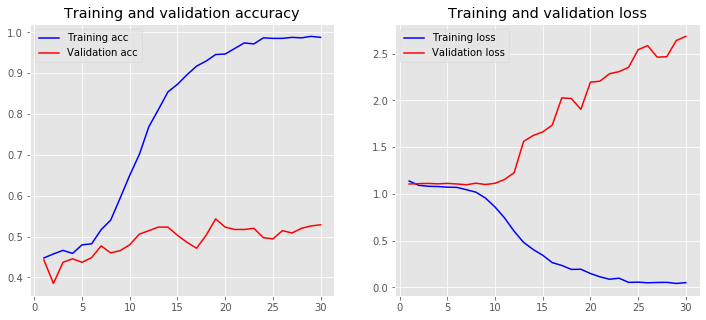

In [40]:
plot_history(history)

In [41]:
y_pred = model.predict(X_test_vec)
print(confusion_matrix(y_test, np.argmax(y_pred, axis = 1)))
print(classification_report(y_test,np.argmax(y_pred, axis = 1)))
print(accuracy_score(y_test, np.argmax(y_pred, axis = 1)))

[[ 68  64   1   0]
 [ 41 105   8   0]
 [ 15  25  10   2]
 [  1   7   0   1]]
              precision    recall  f1-score   support

           0       0.54      0.51      0.53       133
           1       0.52      0.68      0.59       154
           2       0.53      0.19      0.28        52
           3       0.33      0.11      0.17         9

    accuracy                           0.53       348
   macro avg       0.48      0.37      0.39       348
weighted avg       0.53      0.53      0.51       348

0.5287356321839081


## RNN Simple + Pooling

In [46]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 50, 50)            54450     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 200)               10200     
_________________________________________________________________
dense_15 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 804       
Total params: 105,654
Trainable params: 105,654
Non-trainable params: 0
_________________________________________________________________


In [47]:
history = model.fit(X_train_vec, y_train, epochs=40, verbose=2, validation_data=(X_test_vec, y_test), batch_size=10)

Epoch 1/40
81/81 - 0s - loss: 1.1437 - accuracy: 0.4302 - val_loss: 1.1164 - val_accuracy: 0.4425
Epoch 2/40
81/81 - 0s - loss: 1.0872 - accuracy: 0.4574 - val_loss: 1.1075 - val_accuracy: 0.4425
Epoch 3/40
81/81 - 0s - loss: 1.0844 - accuracy: 0.4635 - val_loss: 1.1109 - val_accuracy: 0.4425
Epoch 4/40
81/81 - 0s - loss: 1.0822 - accuracy: 0.4710 - val_loss: 1.1077 - val_accuracy: 0.4425
Epoch 5/40
81/81 - 0s - loss: 1.0748 - accuracy: 0.4710 - val_loss: 1.1009 - val_accuracy: 0.4511
Epoch 6/40
81/81 - 0s - loss: 1.0670 - accuracy: 0.4536 - val_loss: 1.1056 - val_accuracy: 0.4425
Epoch 7/40
81/81 - 0s - loss: 1.0508 - accuracy: 0.4870 - val_loss: 1.0859 - val_accuracy: 0.4856
Epoch 8/40
81/81 - 0s - loss: 1.0148 - accuracy: 0.5315 - val_loss: 1.0903 - val_accuracy: 0.4454
Epoch 9/40
81/81 - 0s - loss: 0.9705 - accuracy: 0.5538 - val_loss: 1.0647 - val_accuracy: 0.4914
Epoch 10/40
81/81 - 0s - loss: 0.9126 - accuracy: 0.5933 - val_loss: 1.0949 - val_accuracy: 0.5086
Epoch 11/40
81/81 -

In [48]:
loss, accuracy = model.evaluate(X_train_vec, y_train, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  0.01922459527850151           Accuracy:  0.9925834536552429


In [49]:
loss, accuracy = model.evaluate(X_test_vec, y_test, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  2.3035833835601807           Accuracy:  0.5632184147834778


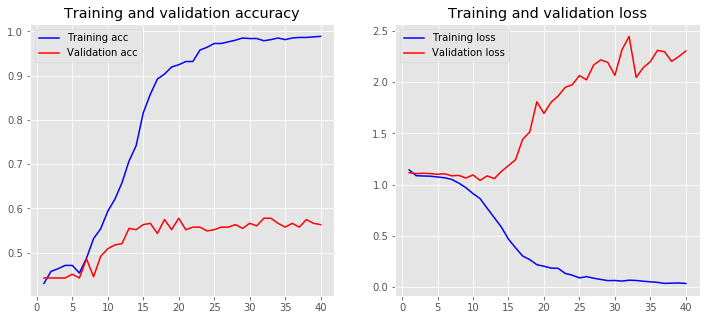

In [50]:
plot_history(history)

In [51]:
y_pred = model.predict(X_test_vec)
print(confusion_matrix(y_test, np.argmax(y_pred, axis = 1)))
print(classification_report(y_test,np.argmax(y_pred, axis = 1)))
print(accuracy_score(y_test, np.argmax(y_pred, axis = 1)))

[[ 65  64   4   0]
 [ 32 110  10   2]
 [  7  24  18   3]
 [  0   5   1   3]]
              precision    recall  f1-score   support

           0       0.62      0.49      0.55       133
           1       0.54      0.71      0.62       154
           2       0.55      0.35      0.42        52
           3       0.38      0.33      0.35         9

    accuracy                           0.56       348
   macro avg       0.52      0.47      0.49       348
weighted avg       0.57      0.56      0.55       348

0.5632183908045977


## RNN + LSTM

In [60]:
import tensorflow as tf
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=maxlen))
model.add(layers.SpatialDropout1D(0.2))
model.add(layers.LSTM(256, dropout=0.2, recurrent_dropout=0.2))
#model.add(layers.LSTM(128)
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 50, 50)            54450     
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 50, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               314368    
_________________________________________________________________
dense_21 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 516       
Total params: 402,230
Trainable params: 402,230
Non-trainable params: 0
_________________________________________________________________


In [61]:
history = model.fit(X_train_vec, y_train, epochs=30, verbose=2, validation_data=(X_test_vec, y_test), batch_size=10)

Epoch 1/30
81/81 - 16s - loss: 1.1272 - accuracy: 0.4326 - val_loss: 1.1101 - val_accuracy: 0.4425
Epoch 2/30
81/81 - 16s - loss: 1.0893 - accuracy: 0.4536 - val_loss: 1.1196 - val_accuracy: 0.4425
Epoch 3/30
81/81 - 16s - loss: 1.0877 - accuracy: 0.4710 - val_loss: 1.1077 - val_accuracy: 0.4425
Epoch 4/30
81/81 - 16s - loss: 1.0873 - accuracy: 0.4685 - val_loss: 1.1200 - val_accuracy: 0.3822
Epoch 5/30
81/81 - 16s - loss: 1.0934 - accuracy: 0.4487 - val_loss: 1.1163 - val_accuracy: 0.4425
Epoch 6/30
81/81 - 16s - loss: 1.0847 - accuracy: 0.4710 - val_loss: 1.1151 - val_accuracy: 0.4425
Epoch 7/30
81/81 - 17s - loss: 1.0909 - accuracy: 0.4450 - val_loss: 1.1094 - val_accuracy: 0.4425
Epoch 8/30
81/81 - 17s - loss: 1.0874 - accuracy: 0.4623 - val_loss: 1.1185 - val_accuracy: 0.4425
Epoch 9/30
81/81 - 16s - loss: 1.0893 - accuracy: 0.4710 - val_loss: 1.1109 - val_accuracy: 0.4425
Epoch 10/30
81/81 - 16s - loss: 1.0850 - accuracy: 0.4710 - val_loss: 1.1092 - val_accuracy: 0.4425
Epoch 11/

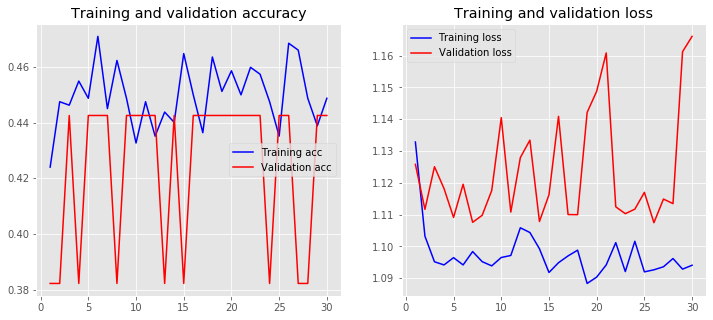

In [54]:
plot_history(history)

In [55]:
y_pred = model.predict(X_test_vec)
print(confusion_matrix(y_test, np.argmax(y_pred, axis = 1)))
print(classification_report(y_test,np.argmax(y_pred, axis = 1)))
print(accuracy_score(y_test, np.argmax(y_pred, axis = 1)))

[[  0 133   0   0]
 [  0 154   0   0]
 [  0  52   0   0]
 [  0   9   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.44      1.00      0.61       154
           2       0.00      0.00      0.00        52
           3       0.00      0.00      0.00         9

    accuracy                           0.44       348
   macro avg       0.11      0.25      0.15       348
weighted avg       0.20      0.44      0.27       348

0.4425287356321839


### Avec 1 couche Bidirectionnelle

In [62]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4)
])

In [63]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [64]:
history = model.fit(X_train_vec, y_train, epochs=30, verbose=2, validation_data=(X_test_vec, y_test), batch_size=10)

Epoch 1/30
81/81 - 4s - loss: 1.2542 - accuracy: 0.4462 - val_loss: 1.1186 - val_accuracy: 0.4310
Epoch 2/30
81/81 - 4s - loss: 1.0897 - accuracy: 0.4635 - val_loss: 1.1104 - val_accuracy: 0.4425
Epoch 3/30
81/81 - 4s - loss: 1.0828 - accuracy: 0.4685 - val_loss: 1.1076 - val_accuracy: 0.4425
Epoch 4/30
81/81 - 4s - loss: 1.0784 - accuracy: 0.4710 - val_loss: 1.1114 - val_accuracy: 0.4425
Epoch 5/30
81/81 - 4s - loss: 1.0742 - accuracy: 0.4808 - val_loss: 1.1057 - val_accuracy: 0.4511
Epoch 6/30
81/81 - 4s - loss: 1.0689 - accuracy: 0.4784 - val_loss: 1.1105 - val_accuracy: 0.4511
Epoch 7/30
81/81 - 4s - loss: 1.0602 - accuracy: 0.5068 - val_loss: 1.0937 - val_accuracy: 0.4598
Epoch 8/30
81/81 - 4s - loss: 1.0454 - accuracy: 0.5426 - val_loss: 1.0980 - val_accuracy: 0.4799
Epoch 9/30
81/81 - 4s - loss: 1.0174 - accuracy: 0.5810 - val_loss: 1.0871 - val_accuracy: 0.4684
Epoch 10/30
81/81 - 4s - loss: 0.9711 - accuracy: 0.5909 - val_loss: 1.0607 - val_accuracy: 0.4885
Epoch 11/30
81/81 -

In [65]:
loss, accuracy = model.evaluate(X_train_vec, y_train, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  0.2502048909664154           Accuracy:  0.9048207402229309


In [66]:
loss, accuracy = model.evaluate(X_test_vec, y_test, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  1.7956767082214355           Accuracy:  0.5660919547080994


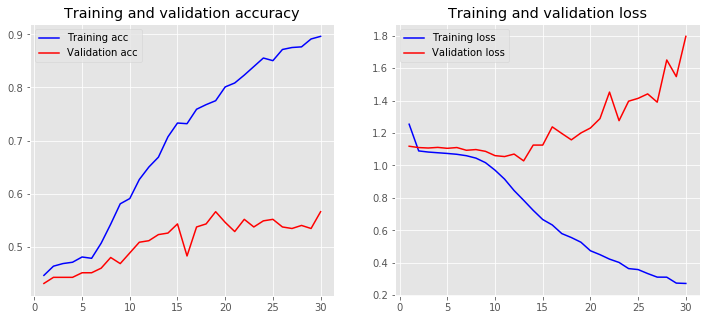

In [67]:
plot_history(history)

In [68]:
y_pred = model.predict(X_test_vec)
print(confusion_matrix(y_test, np.argmax(y_pred, axis = 1)))
print(classification_report(y_test,np.argmax(y_pred, axis = 1)))
print(accuracy_score(y_test, np.argmax(y_pred, axis = 1)))

[[ 66  65   2   0]
 [ 36 110   8   0]
 [  6  26  20   0]
 [  0   4   4   1]]
              precision    recall  f1-score   support

           0       0.61      0.50      0.55       133
           1       0.54      0.71      0.61       154
           2       0.59      0.38      0.47        52
           3       1.00      0.11      0.20         9

    accuracy                           0.57       348
   macro avg       0.68      0.43      0.46       348
weighted avg       0.58      0.57      0.56       348

0.5660919540229885


In [69]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4)
])

In [70]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [71]:
history = model.fit(X_train_vec, y_train, epochs=30, verbose=2, validation_data=(X_test_vec, y_test), batch_size=10)

Epoch 1/30
81/81 - 5s - loss: 1.2989 - accuracy: 0.4586 - val_loss: 1.1467 - val_accuracy: 0.4425
Epoch 2/30
81/81 - 4s - loss: 1.1412 - accuracy: 0.4574 - val_loss: 1.1151 - val_accuracy: 0.4425
Epoch 3/30
81/81 - 4s - loss: 1.1305 - accuracy: 0.4450 - val_loss: 1.1137 - val_accuracy: 0.4425
Epoch 4/30
81/81 - 4s - loss: 1.1296 - accuracy: 0.4363 - val_loss: 1.1107 - val_accuracy: 0.4425
Epoch 5/30
81/81 - 4s - loss: 1.1095 - accuracy: 0.4672 - val_loss: 1.1137 - val_accuracy: 0.4425
Epoch 6/30
81/81 - 4s - loss: 1.1038 - accuracy: 0.4487 - val_loss: 1.1104 - val_accuracy: 0.4425
Epoch 7/30
81/81 - 4s - loss: 1.1096 - accuracy: 0.4413 - val_loss: 1.1097 - val_accuracy: 0.4425
Epoch 8/30
81/81 - 4s - loss: 1.0995 - accuracy: 0.4586 - val_loss: 1.1062 - val_accuracy: 0.4425
Epoch 9/30
81/81 - 4s - loss: 1.0992 - accuracy: 0.4598 - val_loss: 1.1049 - val_accuracy: 0.4425
Epoch 10/30
81/81 - 4s - loss: 1.0977 - accuracy: 0.4487 - val_loss: 1.1037 - val_accuracy: 0.4425
Epoch 11/30
81/81 -

In [72]:
loss, accuracy = model.evaluate(X_train_vec, y_train, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  0.22593696415424347           Accuracy:  0.9283065795898438


In [73]:
loss, accuracy = model.evaluate(X_test_vec, y_test, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  1.5289227962493896           Accuracy:  0.5660919547080994


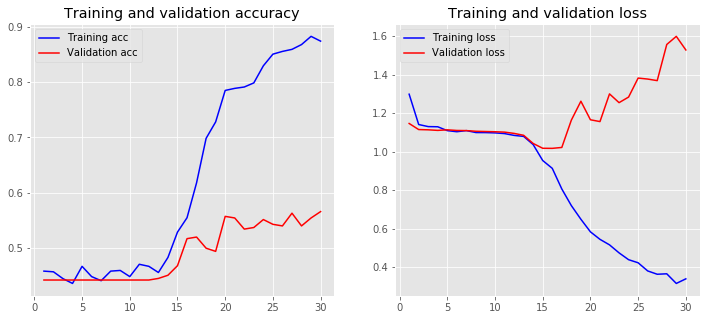

In [74]:
plot_history(history)

In [75]:
y_pred = model.predict(X_test_vec)
print(confusion_matrix(y_test, np.argmax(y_pred, axis = 1)))
print(classification_report(y_test,np.argmax(y_pred, axis = 1)))
print(accuracy_score(y_test, np.argmax(y_pred, axis = 1)))

[[ 69  59   5   0]
 [ 29 110  15   0]
 [ 12  22  16   2]
 [  0   4   3   2]]
              precision    recall  f1-score   support

           0       0.63      0.52      0.57       133
           1       0.56      0.71      0.63       154
           2       0.41      0.31      0.35        52
           3       0.50      0.22      0.31         9

    accuracy                           0.57       348
   macro avg       0.53      0.44      0.46       348
weighted avg       0.56      0.57      0.56       348

0.5660919540229885


## CNN

### Avec 2 coucheS de Convolution

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Embedding

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=maxlen, 
                    #embeddings_initializer = Constant(embedding_matrix),
#                    weights=[embedding_matrix], 
                    trainable=False))
model.add(Dropout(0.2))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_vec, y_train,
          epochs=30,
          validation_data=(X_test_vec, y_test))
print(model.summary())

Epoch 1/30
26/26 [==============================] - 0s 15ms/step - loss: 1.1541 - accuracy: 0.4339 - val_loss: 1.1108 - val_accuracy: 0.4425
Epoch 2/30
26/26 [==============================] - 0s 12ms/step - loss: 1.0843 - accuracy: 0.4697 - val_loss: 1.1097 - val_accuracy: 0.4425
Epoch 3/30
26/26 [==============================] - 0s 16ms/step - loss: 1.0831 - accuracy: 0.4710 - val_loss: 1.1096 - val_accuracy: 0.4425
Epoch 4/30
26/26 [==============================] - 0s 13ms/step - loss: 1.0746 - accuracy: 0.4907 - val_loss: 1.1129 - val_accuracy: 0.4368
Epoch 5/30
26/26 [==============================] - 0s 12ms/step - loss: 1.0681 - accuracy: 0.4845 - val_loss: 1.1122 - val_accuracy: 0.4454
Epoch 6/30
26/26 [==============================] - 0s 12ms/step - loss: 1.0677 - accuracy: 0.4710 - val_loss: 1.1147 - val_accuracy: 0.4483
Epoch 7/30
26/26 [==============================] - 0s 18ms/step - loss: 1.0561 - accuracy: 0.5043 - val_loss: 1.1121 - val_accuracy: 0.4483
Epoch 8/30
26

In [89]:
loss, accuracy = model.evaluate(X_train_vec, y_train, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  0.31964111328125           Accuracy:  0.8961681127548218


In [90]:
loss, accuracy = model.evaluate(X_test_vec, y_test, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  1.1699421405792236           Accuracy:  0.5431034564971924


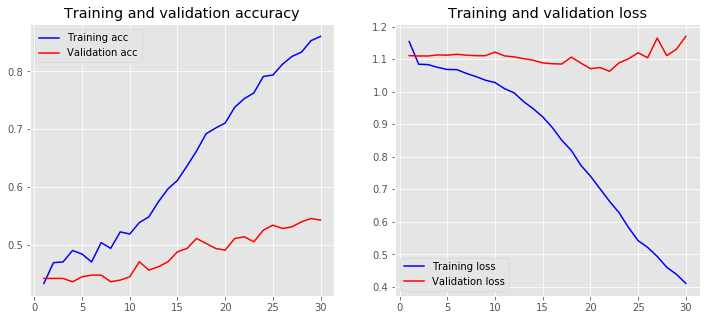

In [91]:
plot_history(history)

In [92]:
y_pred = model.predict(X_test_vec)
print(confusion_matrix(y_test, np.argmax(y_pred, axis = 1)))
print(classification_report(y_test,np.argmax(y_pred, axis = 1)))
print(accuracy_score(y_test, np.argmax(y_pred, axis = 1)))

[[ 60  72   1   0]
 [ 28 123   3   0]
 [ 10  36   6   0]
 [  0   6   3   0]]
              precision    recall  f1-score   support

           0       0.61      0.45      0.52       133
           1       0.52      0.80      0.63       154
           2       0.46      0.12      0.18        52
           3       0.00      0.00      0.00         9

    accuracy                           0.54       348
   macro avg       0.40      0.34      0.33       348
weighted avg       0.53      0.54      0.50       348

0.5431034482758621


### Avec 1 couche de Convolution

In [103]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=maxlen, 
                    #embeddings_initializer = Constant(embedding_matrix),
#                    weights=[embedding_matrix], 
                    trainable=False))
model.add(Dropout(0.2))
model.add(Conv1D(filters=256, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
#model.add(Conv1D(filters=64, kernel_size=5, activation='relu'))
#model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_vec, y_train,
          epochs=40,
          validation_data=(X_test_vec, y_test))
print(model.summary())

Epoch 1/40
26/26 [==============================] - 0s 16ms/step - loss: 1.1686 - accuracy: 0.4438 - val_loss: 1.1102 - val_accuracy: 0.4339
Epoch 2/40
26/26 [==============================] - 0s 12ms/step - loss: 1.0755 - accuracy: 0.4845 - val_loss: 1.1096 - val_accuracy: 0.4454
Epoch 3/40
26/26 [==============================] - 0s 13ms/step - loss: 1.0806 - accuracy: 0.4907 - val_loss: 1.1109 - val_accuracy: 0.4339
Epoch 4/40
26/26 [==============================] - 0s 12ms/step - loss: 1.0610 - accuracy: 0.5142 - val_loss: 1.1096 - val_accuracy: 0.4483
Epoch 5/40
26/26 [==============================] - 0s 12ms/step - loss: 1.0475 - accuracy: 0.5278 - val_loss: 1.1122 - val_accuracy: 0.4713
Epoch 6/40
26/26 [==============================] - 0s 13ms/step - loss: 1.0382 - accuracy: 0.5464 - val_loss: 1.1042 - val_accuracy: 0.4397
Epoch 7/40
26/26 [==============================] - 0s 13ms/step - loss: 1.0135 - accuracy: 0.5698 - val_loss: 1.1021 - val_accuracy: 0.4511
Epoch 8/40
26

In [104]:
loss, accuracy = model.evaluate(X_train_vec, y_train, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  0.23373082280158997           Accuracy:  0.9592089056968689


In [105]:
loss, accuracy = model.evaluate(X_test_vec, y_test, verbose=False)
print("Loss: ", loss, "          Accuracy: ",accuracy)

Loss:  1.1638288497924805           Accuracy:  0.49712643027305603


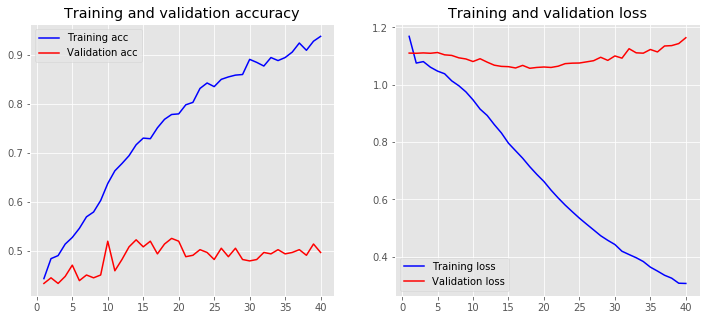

In [106]:
plot_history(history)

In [107]:
y_pred = model.predict(X_test_vec)
print(confusion_matrix(y_test, np.argmax(y_pred, axis = 1)))
print(classification_report(y_test,np.argmax(y_pred, axis = 1)))
print(accuracy_score(y_test, np.argmax(y_pred, axis = 1)))

[[ 58  75   0   0]
 [ 38 108   8   0]
 [ 13  31   6   2]
 [  2   4   2   1]]
              precision    recall  f1-score   support

           0       0.52      0.44      0.48       133
           1       0.50      0.70      0.58       154
           2       0.38      0.12      0.18        52
           3       0.33      0.11      0.17         9

    accuracy                           0.50       348
   macro avg       0.43      0.34      0.35       348
weighted avg       0.48      0.50      0.47       348

0.49712643678160917


In [116]:
np.argmax(y_pred, axis = 1).shape

(348,)